#CEFET/RJ

**PPCIC - Programa de Pós-Graduação em Ciência da Computação**

**Mestrado em Ciência da Computação**

---

**Decision Tree (Árvores de Decisão)**

**Disciplina**: Aprendizado de Máquina

**Professor**: Eduardo Bezerra

**Aluno**: Janio de Souza Lima

#1 Treinando e visualizando uma árvore de decisão

Árvores de decisão podem ser usadas em tarefas de classificação, regressão e mesmo em tarefas multioutput.

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [38]:
#Carga dos dados
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [39]:
#Treinameto e execução do modelo
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Com o modelo treinado é gerada uma visualização da árvore de decisão.

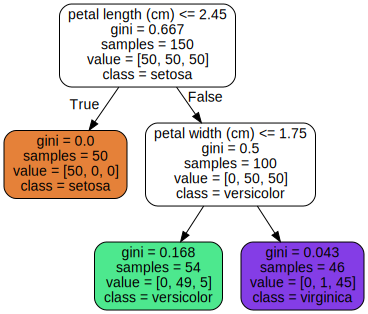

In [40]:
import os
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

Elmentos da árvore:
* A primeira linha de cada nó é a condição para definição dos nós filhos (se houver).
* `gini`: Coeficiente Gini é o grau de impureza do nó definido pela equação $G_i = 1 - \sum_{k=1}^{n}P_{i,k}^2$. O nó é puro (gini=0) se todas as instâncias pertencem à mesma classe do nó.
* `samples`: quantidade de observações pertencentes ao nó.
* `value`: quantidade de instância para cada classe.
* `class`: a classe prevista

In [41]:
#Converter arquivo .dot em .png
!dot -Tpng iris_tree.dot -o iris_tree.png

Comparação entre Gini e entropia.
O algoritmo implementado no Scikit-Learn por padrão usa o coeficiente Gini como medida de impureza, mas também é possível usar o cálculo de entropia para este mesmo objetivo, mas não há muita diferença nos valores obtidos.

---

A visualização abaixo compara os valores com as duas abordagens.

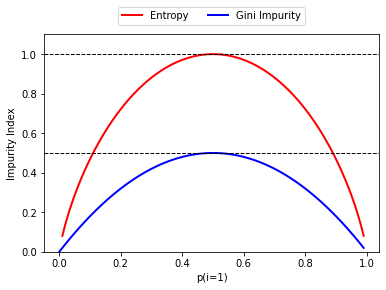

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, gini(x)], 
                          ['Entropy', 'Gini Impurity'],
                          ['-', '-', '--', '-.'],
                          ['red', 'blue', 'black', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

plt.savefig('plot1.png')

#2 Aplicação do modelo

##2.1 Previsões com a árvore de decisão

In [45]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

Geração de valores hipotéticos para realizar previsão e visualização da fronteira de decisão

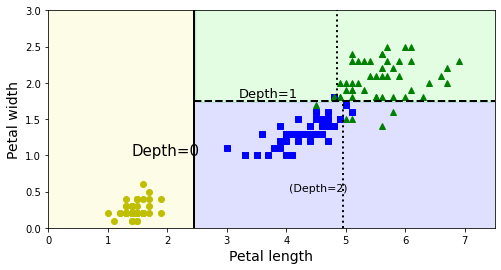

In [46]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.savefig('plot2.1.png')

##2.2 Probabilidades com a árvore de decisão

Estimativa de probabilidade de uma flor com 5cm de comprimento e 1,5cm de largura de pétala.

A saída da probabilidade, mostra a probabilidade para cada classe possível.

In [47]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

Usando `predict` confirmamos que a classe prevista é a de maior probabilidade.

In [48]:
tree_clf.predict([[5, 1.5]])

array([1])

##2.3 Árvore de Decisão com Regularização (Classificador)

In [49]:
#Carga do conjunto de dados
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

Criação de dois modelos, sendo o primeiro não paramétrico (sem definição de restrições que possam regularizar o modelo) e o segundo regularizado a partir da liminação do número de mínimo de folhas.

In [50]:
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Exibição do resultado das previsões na fronteira de decisão para comparar os resultados e verificar sobre ajustamento no modelo não paramétrico.

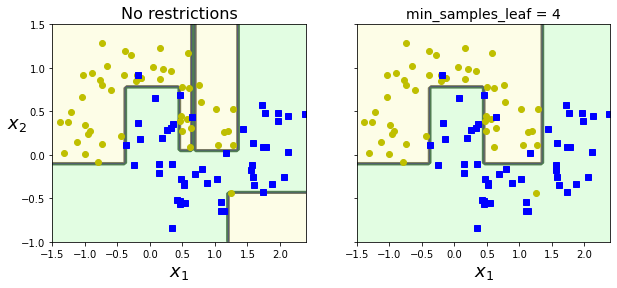

In [51]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

plt.savefig('plot2.3.png')

#3 Regressão com Árvores de Decisão

##3.1 Criação e aplicação do modelo

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
#Geração de dados de exemplo
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [54]:
#Criação e treinamento do modelo
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Visualização dos resultados

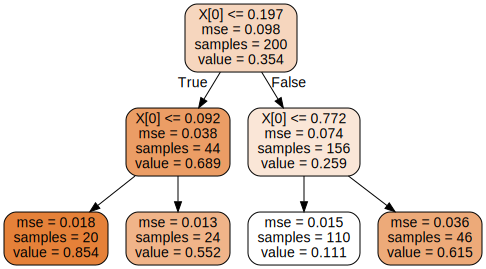

In [55]:
export_graphviz(
        tree_reg,
        out_file="reg_tree.dot",
        #feature_names=iris.feature_names[2:],
        #class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("reg_tree.dot")

In [56]:
#Converter arquivo .dot em .png
!dot -Tpng reg_tree.dot -o reg_tree.png

Na regressão ao invés de uma classe a previsão (value) é de um valor que representa o valor médio das instâncias previstas para determinado nó. Também é exibido o erro quadrático médio desta previsão (mse). O algoritmo atua de maneira similar ao classificador, mas ao invés de reduzir a impureza é buscada a redução do mse.

---

A visualização a seguir demonstra estas previsões e realiza outra com `max_depth`=3.

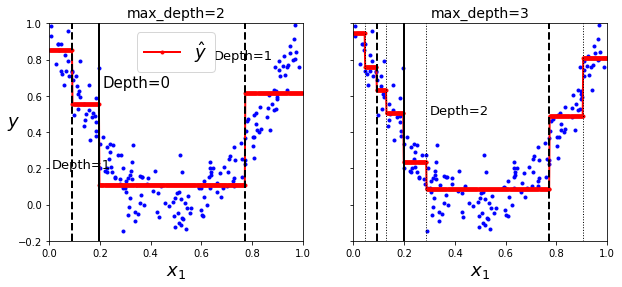

In [57]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.savefig('plot3.1.png')

##3.2 Árvore de Decisão com Regularização (Regressor)

Da mesma forma que o classificador, é possível regularizar o modelo ao ajustar os parâmetros.

In [58]:
#Criação de modelos
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)

#Treinamento do modelo
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [59]:
#Criação de conjunto de dados de exemplo
x1 = np.linspace(0, 1, 500).reshape(-1, 1)

#Predição usado os modelos com e sem regularização
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

Comparação das predições usando ambos modelos.
Fica evidente o sobreajustamento no modelo não regularizado.

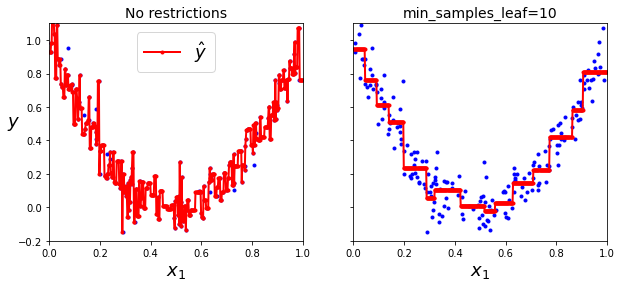

In [60]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.savefig('plot3.2.png')

#Considerações Finais

* Árvores de decisão são fáceis de entender e interpretar, além de serem versáteis.
* Elas são sensíveis à rotação do eixo dos dados, podendo gerar modelos diferentes e com dificuldade de generalização apenas pela rotação.
* Facilmente de sobreajustam, por isso, é importante aplicar técnicas de regularização pelo ajuste dos parâmetros.
* São muito sensíveis a variações nos dados de treinamento.
* O algoritmo é estocástico, por isso, para um mesmo conjunto de dados podem ser obtidos modelos diferentes.

#Referências

**Referências**

McKinney, Wes (2018). **Python para Análise de Dados**: tratamento de dados com pandas, numpy e iPython. Traduzido por Lúcia A. Kinoshita. Novatec.

Géron, Aurélien (2019). **Mãos à Obra Aprendizagem de Máquina com Scikit-Learn & TensorFlow:** Conceitos, ferramentas e técnicas para a construção de sistemas inteligentes. Traduzido por Rafael Contatori. Alta Books.

Grus, Joel (2016). **Data Science do Zero:** Primeiras regras com Python. Traduzido por Welington Nascimento. Alta Books.

---
Conteúdos adicionais e explicações detalhadas do algoritmo em:

https://github.com/MLRG-CEFET-RJ/ml-class/blob/master/ppcic_ml_dtree.ipynb

https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb